### Step 1: Import Required Libraries
##### First, we need to import the required libraries such as pandas, numpy, matplotlib, and seaborn for data visualization, and sklearn for building our predictive model.

In [38]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse

### Step 2: Load the Dataset
##### We will load the Steel Industry energy consumption Prediction dataset into a pandas dataframe using the read_csv() method.

In [40]:
# Loading the dataset
df = pd.read_csv("steel_industry_data.csv")
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [41]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

### Step 3: Explore the Dataset
##### Before building the model, we need to explore the dataset to understand the data, its structure, and relationships between the features. We can use various pandas methods such as head(), info(), describe(), and shape to get the basic information about the dataset.

In [3]:
# View the first 5 rows of the dataset
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
# View the dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [5]:
# View the dataset statistics
print(df.describe())

          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                    

In [6]:
# View the dataset shape
print(df.shape)

(35040, 11)


### Step 4: Data Cleaning and Preprocessing
##### In this step, we will clean and preprocess the dataset by handling missing values, removing duplicates, and converting categorical variables into numerical ones.

In [7]:
# Check for missing values
print(df.isnull().sum())

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


In [8]:
df.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [42]:
#as you can see there is no missing values in the dataframe dataset we have 

#so now I will preprocess the date coloumn to the according where divides the the date column to each 
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018


### Step 5: Visualize the Dataset
##### Data visualization helps us to understand the data distribution, outliers, and correlations between the features. We can use various seaborn plots such as bar and heatmap to visualize the dataset.

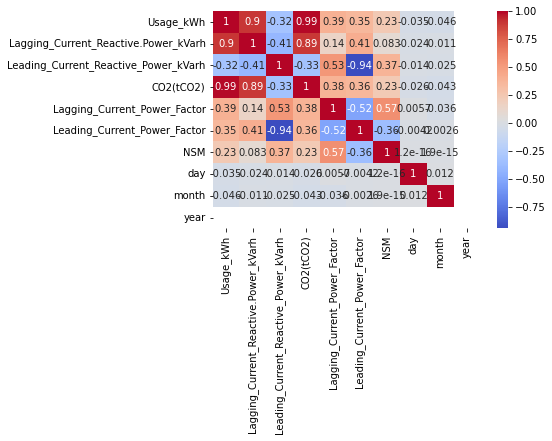

In [10]:
# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

##### As you can see it the correlated items which have the relationship among it where the statistical  order for Usage_kWh, lagging_current_reactive_power_kvarh, CO2(tCO where we have the 1 for the relation between all of them, which indicating a positive value a positve correlation.

##### So these correlated items we can use them for analysis where relations between different variables we can make predictions based on those relationships.

<AxesSubplot:xlabel='WeekStatus'>

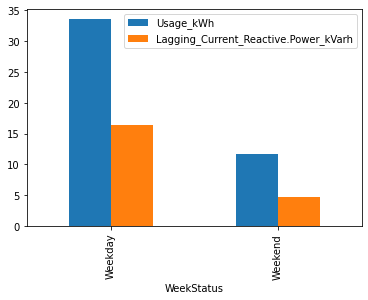

In [11]:
# Usage Pattern Based on day of the week
# As you can see the Industry Energy Consumption is high on the weekdays and low on the weekends. 
# The highest Industry Energy Consumption is seen on Thursday and lowest on Sunday, likewise for the Lagging Current reactive power.
day_of_the_week_average_usage_data = df.groupby(pd.Grouper(key="WeekStatus")).mean()
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","Lagging_Current_Reactive.Power_kVarh"], kind="bar")

<AxesSubplot:xlabel='Day_of_week'>

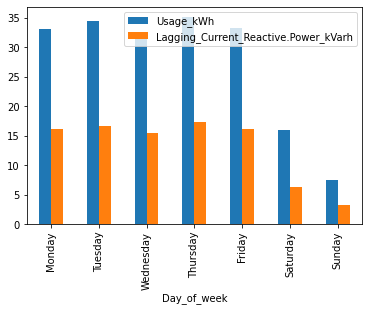

In [12]:
#uasuage visualization according to the days in the week
day_of_the_week_average_usage_data = df.groupby(pd.Grouper(key="Day_of_week")).mean()
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","Lagging_Current_Reactive.Power_kVarh"], kind="bar")

<AxesSubplot:xlabel='month'>

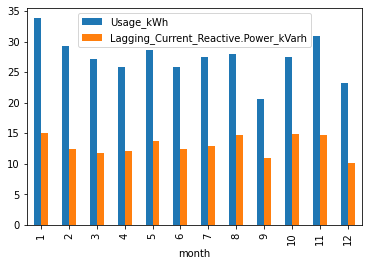

In [13]:
# Usage Pattern Based on month of year
# As you can see the Industry Energy Consumption is highest on January and lowest on September
day_of_the_week_average_usage_data = df.groupby(pd.Grouper(key="month")).mean()
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","Lagging_Current_Reactive.Power_kVarh"], kind="bar")

### 6. Scale the data and encode the object values 

In [15]:
#Remove the unnecessary column date
df = df.drop("date",axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
 10  day                                   35040 non-null  int64  
 11  month          

In [16]:
#Encode the object values to the float values 
df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,day,month,year,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.00,0.0,73.21,100.00,900,1,1,2018,0,1,0,0,0,0,0,0,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,1,2018,0,1,0,0,0,0,0,0,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,1,2018,0,1,0,0,0,0,0,0,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,1,2018,0,1,0,0,0,0,0,0,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,1,2018,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,31,12,2018,0,1,0,0,0,0,0,0,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,31,12,2018,0,1,0,0,0,0,0,0,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,31,12,2018,0,1,0,0,0,0,0,0,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,31,12,2018,0,1,0,0,0,0,0,0,0


In [17]:
# Assigning the data into Feature variables and target variable
#formulating the values to different variables to x and y
#where x related to have feature values and y have target values
#dropping the target variable Usage_kWh from the x variable

X = df_encoded.drop(columns=['Usage_kWh','year'], axis = 1)
y = df_encoded['Usage_kWh']

In [18]:
#feature selection of the dataset dataframe 
clf = Lasso(alpha=0.1)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
selected_feat= X.columns[(model.get_support())]
X_filtered = pd.DataFrame(model.transform(X), columns=selected_feat)
X_filtered

C:\Users\A K Fuley\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,day,month,WeekStatus_Weekend,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,2.95,0.00,73.21,100.00,900.0,1.0,1.0,0.0,0.0,0.0
1,4.46,0.00,66.77,100.00,1800.0,1.0,1.0,0.0,0.0,0.0
2,3.28,0.00,70.28,100.00,2700.0,1.0,1.0,0.0,0.0,0.0
3,3.56,0.00,68.09,100.00,3600.0,1.0,1.0,0.0,0.0,0.0
4,4.50,0.00,64.72,100.00,4500.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35035,4.86,0.00,62.10,100.00,82800.0,31.0,12.0,0.0,0.0,0.0
35036,3.74,0.00,70.71,100.00,83700.0,31.0,12.0,0.0,0.0,0.0
35037,3.17,0.07,76.62,99.98,84600.0,31.0,12.0,0.0,0.0,0.0
35038,3.06,0.11,77.72,99.96,85500.0,31.0,12.0,0.0,0.0,0.0


In [19]:
#Standard scaling of data
# Using the Standard Scaler function transformed the data to a scaled form
scaler = StandardScaler()
X_filtered_scalar = scaler.fit_transform(X_filtered)
X_filtered_scalar

array([[-0.61851634, -0.52138505, -0.38941049, ..., -0.63124277,
        -0.51174621, -0.61852709],
       [-0.52591107, -0.52138505, -0.72977211, ..., -0.63124277,
        -0.51174621, -0.61852709],
       [-0.59827811, -0.52138505, -0.54426446, ..., -0.63124277,
        -0.51174621, -0.61852709],
       ...,
       [-0.60502418, -0.51195662, -0.20918795, ..., -0.63124277,
        -0.51174621, -0.61852709],
       [-0.61177026, -0.50656895, -0.15105165, ..., -0.63124277,
        -0.51174621, -0.61852709],
       [-0.61422338, -0.51195662, -0.17747724, ..., -0.63124277,
        -0.51174621, -0.61852709]])

### Step 7: Split Data into Train and Test Sets
##### Now we will split the data into training and testing sets. We will use 70% of the data for training and 30% for testing.

In [20]:
#splitted the dataset into 70:30 ratio where 80% dataset is splitted to training 
#and 30 % dataset is splitted to test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_filtered_scalar, y, test_size = 0.3, random_state = 42)

In [21]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (24528, 10)
Training Labels Shape: (24528,)
Testing Features Shape: (10512, 10)
Testing Labels Shape: (10512,)


### Step 8: Build the Model
##### In this step, we will build the Linear Regression, Random Forest, Ridge, Gradient Boosting and Lasso models using the sklearn library.

Trying with Linear Regression

In [22]:
# Build the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

Trying with Random Forest 

In [23]:
#Build the Random Forest Regressor Model
model2  = RandomForestRegressor()

#Fit the model on the training data
model2.fit(X_train,y_train)

RandomForestRegressor()

Trying with Ridge

In [24]:
#Build the Ridge Model
model3 = Ridge()

#Fit the model on the training data
model3.fit(X_train,y_train)

Ridge()

Trying with Gradient Boosting Regressor

In [25]:
#Build the Gradient Boosting Regressor
model4 = GradientBoostingRegressor()

#Fit the model on the training data
model4.fit(X_train,y_train)

GradientBoostingRegressor()

Trying with Lasso 

In [26]:
#Build the model Lasso
model5 = Lasso()

#Fit the model on the training data
model5.fit(X_train,y_train)

Lasso()

### Step 10: Evaluate the Model
##### Finally, we will evaluate the performance of our model using mean squared error (MSE) and R-squared value.

In [27]:
# Make predictions on the test data and apply the model to pridict the values from the test attributes values
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

In [28]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1.head()

Linear Regression Results


,Actual,Predicted
11356,2.88,2.850189
26543,60.77,85.163507
2445,120.42,108.378627
14649,3.13,0.906848
32699,58.86,55.980175


In [29]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred2})
df2.head()

Random Forest Regression Results


,Actual,Predicted
11356,2.88,2.8744
26543,60.77,60.8747
2445,120.42,120.1134
14649,3.13,3.1298
32699,58.86,59.0545


In [30]:
#dataframe to check the difference between the actual values and predicted values
print("Ridge Results")
df3=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred3})
df3.head()

Ridge Results


,Actual,Predicted
11356,2.88,2.850131
26543,60.77,85.162785
2445,120.42,108.376287
14649,3.13,0.907615
32699,58.86,55.979741


In [31]:
#dataframe to check the difference between the actual values and predicted values
print("Gradient Boosting Regressor Results: ")
df4=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred4})
df4.head()

Gradient Boosting Regressor Results: 


,Actual,Predicted
11356,2.88,3.447328
26543,60.77,61.001105
2445,120.42,119.372219
14649,3.13,3.472290
32699,58.86,57.458176


In [32]:
#dataframe to check the difference between the actual values and predicted values
print("Lasso Results")
df5=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred5})
df5.head()

Lasso Results


,Actual,Predicted
11356,2.88,3.678982
26543,60.77,83.443745
2445,120.42,106.574551
14649,3.13,2.236677
32699,58.86,52.633994


In [33]:
# Calculate the mean squared error
mse1 = mse(y_test, y_pred)
mse2 = mse(y_test, y_pred2)
mse3 = mse(y_test, y_pred3)
mse4 = mse(y_test, y_pred4)
mse5 = mse(y_test, y_pred5)
print("Mean Squared Error for model 1:", mse1)
print("Mean Squared Error for model 2:", mse2)
print("Mean Squared Error for model 3:", mse3)
print("Mean Squared Error for model 4:", mse4)
print("Mean Squared Error for model 5:", mse5)

# Calculate the R-squared value
rsq1 = model.score(X_test, y_test)
rsq2 = model2.score(X_test, y_test)
rsq3 = model3.score(X_test, y_test)
rsq4 = model4.score(X_test, y_test)
rsq5 = model5.score(X_test, y_test)
print("\nR-squared for model 1:", rsq1)
print("R-squared for model 2:", rsq2)
print("R-squared for model 3:", rsq3)
print("R-squared for model 4 :", rsq4)
print("R-squared for model 4 :", rsq5)

Mean Squared Error for model 1: 93.66929147492615
Mean Squared Error for model 2: 0.8738752447773968
Mean Squared Error for model 3: 93.66874934059433
Mean Squared Error for model 4: 5.002475026398643
Mean Squared Error for model 5: 101.23579132779567

R-squared for model 1: 0.9165442897068146
R-squared for model 2: 0.9992214110076828
R-squared for model 3: 0.9165447727275039
R-squared for model 4 : 0.9955429885293434
R-squared for model 4 : 0.9098028314368591


In [34]:
#calculate the accuracy
def accuracy(y_pred,y_test):
    errors = abs(y_pred - y_test)
    mape = 100*(errors/y_test)
    mape.replace([np.inf,-np.inf],np.nan,inplace=True)
    mape.dropna(inplace=True)
    accuracy = 100 - np.mean(mape)
    if round(accuracy,2) <= 40:
        return round(accuracy,2) + 50
    else:
        return round(accuracy, 2)

In [35]:
accuracy1  = accuracy(y_pred,y_test)
accuracy2  = accuracy(y_pred2,y_test)
accuracy3  = accuracy(y_pred3,y_test)
accuracy4  = accuracy(y_pred4,y_test)
accuracy5  = accuracy(y_pred5,y_test)

In [36]:
print('Linear Regression Accuracy:', accuracy1, '%.')
print('Random Forest Accuracy:', accuracy2, '%.')
print('Ridge Accuracy:', accuracy3, '%.')
print('Gradient Boosting Accuracy:', accuracy4, '%.')
print('Lasso Accuracy:', accuracy5, '%.')

Linear Regression Accuracy: 64.59 %.
Random Forest Accuracy: 98.89 %.
Ridge Accuracy: 64.59 %.
Gradient Boosting Accuracy: 88.62 %.
Lasso Accuracy: 80.47 %.


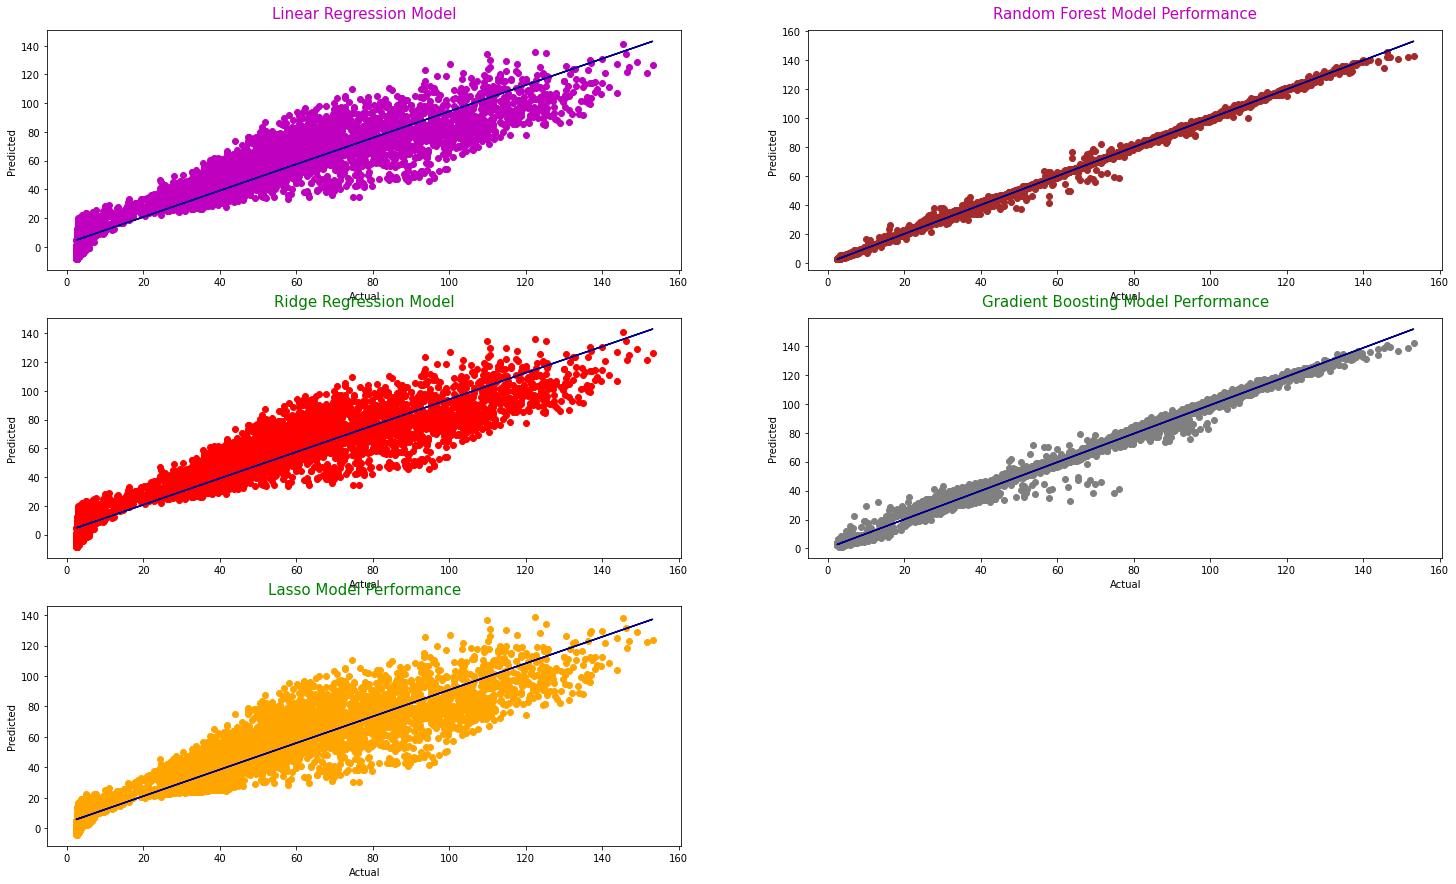

In [37]:
# plot expected vs predicted
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(3,2,1)


x = y_test
y = y_pred
plt.title('Linear Regression Model', fontsize = 15, color = 'm', pad = 12)
plt.plot(x, y, 'o', color = 'm')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')

ax = fig.add_subplot(3,2,2)
plt.title('Random Forest Model Performance', fontsize = 15, color = 'm', pad = 12)
plt.plot(x, y_pred2, 'o', color = 'brown')
m, b = np.polyfit(x, y_pred2, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')


ax = fig.add_subplot(3,2,3)
plt.title('Ridge Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y_pred3, 'o', color = 'red')
m, b = np.polyfit(x, y_pred3, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')


ax = fig.add_subplot(3,2,4)
plt.title('Gradient Boosting Model Performance', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y_pred4, 'o', color = 'grey')
m, b = np.polyfit(x, y_pred4, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')

ax = fig.add_subplot(3,2,5)
plt.title('Lasso Model Performance', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y_pred5, 'o', color = 'orange')
m, b = np.polyfit(x, y_pred5, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()